In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
!pip install country_converter
import country_converter

In [52]:
# Load the data into a pandas DataFrame
df = pd.read_csv("Data Science Job Salaries/ds_salaries.csv")

In [53]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [54]:
df.columns


Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [55]:
# Dropping the 'Unnamed' column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(607, 11)

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [57]:
# Identifying duplicate data
df.duplicated().sum()

42

In [58]:
# Removing duplicate data
df.drop_duplicates(inplace=True)

In [59]:
# Experience level
df['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [60]:
# Change country names from ISO2 to original names
# There are two features containing country names, "company_location" and "employee_residence"
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'], to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'], to='name_short')

df['company_location'][:5]

0           Germany
1             Japan
2    United Kingdom
3          Honduras
4     United States
Name: company_location, dtype: object

In [61]:
# Experience level
df['experience_level'].value_counts()

df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [62]:
# Employment type
df['employment_type'].value_counts()

df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [63]:
# Company size
df['company_size'].value_counts()

df['company_size'] = df['company_size'].map({
    'M': 'Medium',
    'L': 'Large',
    'S': 'Small'
})


In [64]:
# Drop salary and salary_currency features (salary_in_usd is enough to keep on)
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [65]:
# Rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)


In [66]:
# Work year
df['work_year'].value_counts()

2022    278
2021    215
2020     72
Name: work_year, dtype: int64

In [67]:
# Remote ratio : 100-fully remote ; 50-Hybrid ; 0-fully onsite
df['remote_ratio'].value_counts()

100    346
0      121
50      98
Name: remote_ratio, dtype: int64

In [68]:
# Renmame remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)

In [69]:
# Change 100 to remote, 0 to onsite, 50 to hybrid
df['job_type'] = df['job_type'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid',
})

In [70]:
# Various positions offered for a Data Science job
df['job_title'].value_counts()

Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

C:\Users\gagas\AppData\Local\Temp\ipykernel_2476\2738883730.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['salary'])


Text(0.5, 1.0, 'Salary Distribution')

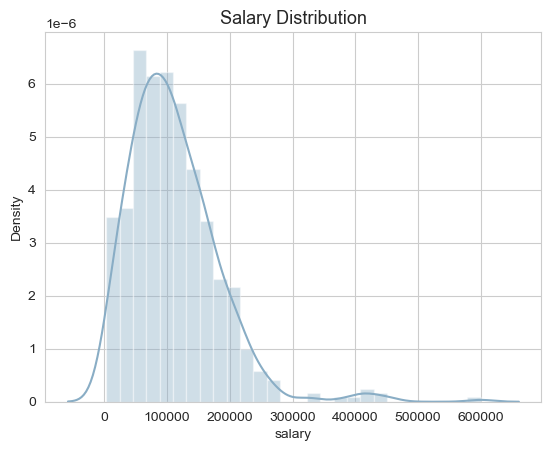

In [81]:
# Salary distribution
sns.set_palette('twilight')
ax = sns.distplot(df['salary'])
ax.set_title('Salary Distribution', fontdict={'fontsize': 13})

In [72]:
# Mean salary of employees with different experience levels
mean_salary_exp_level = df.groupby('experience_level')['salary'].mean().sort_values(ascending=False)
mean_salary_exp_level


experience_level
Executive    199392.038462
Senior       138374.880658
Mid           87792.995192
Entry         61643.318182
Name: salary, dtype: float64

Text(0.5, 1.0, 'Experience Level VS Salary')

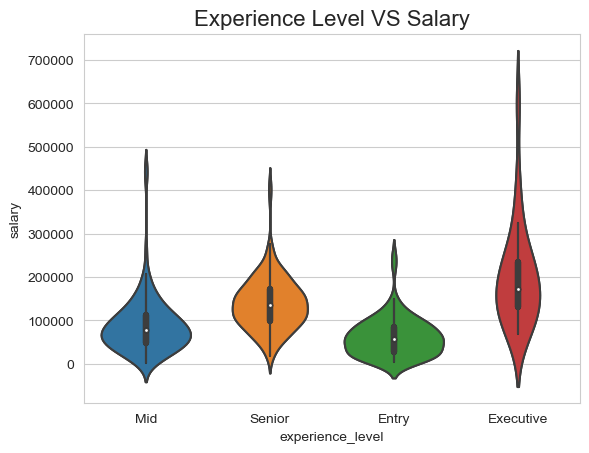

In [73]:
# Drop rows with missing values in the 'salary' column
df.dropna(subset=['salary'], inplace=True)

# Plot the violin plot
sns.violinplot(data=df, x='experience_level', y='salary')


sns.set_palette('tab10')
sns.set_style('whitegrid')
ax = sns.violinplot(data=df, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary', fontdict={'fontsize': 16})

Text(0, 0.5, 'Mean Salary')

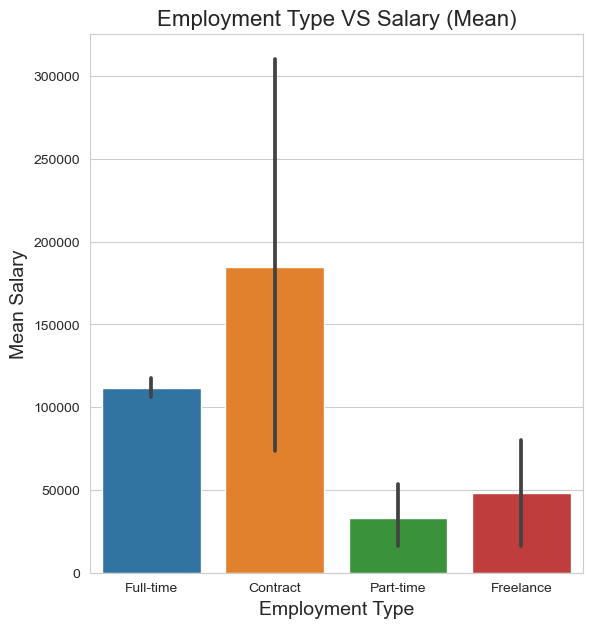

In [74]:
# Mean salary of employees with different employment types
mean_salary_emp_type = df.groupby('employment_type')['salary'].mean().sort_values(ascending=True)
mean_salary_emp_type

plt.figure(figsize=(14, 7))
sns.set_palette('tab10')

plt.subplot(1, 2, 1)
ax = sns.barplot(data=df, x='employment_type', y='salary', estimator=np.mean)
ax.set_title('Employment Type VS Salary (Mean)', fontdict={'fontsize': 16})
ax.set_xlabel('Employment Type', fontdict={'fontsize': 14})
ax.set_ylabel('Mean Salary', fontdict={'fontsize': 14})

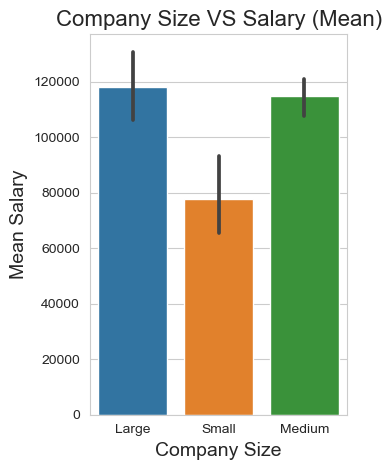

In [75]:
#Mean salary of employees in different company sizes
mean_salary_comp_size = df.groupby('company_size')['salary'].mean().sort_values(ascending=True)
mean_salary_comp_size

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df, x='company_size', y='salary', estimator=np.mean)
ax.set_title('Company Size VS Salary (Mean)', fontdict={'fontsize': 16})
ax.set_xlabel('Company Size', fontdict={'fontsize': 14})
ax.set_ylabel('Mean Salary', fontdict={'fontsize': 14})

plt.tight_layout()

Text(0, 0.5, 'Salary')

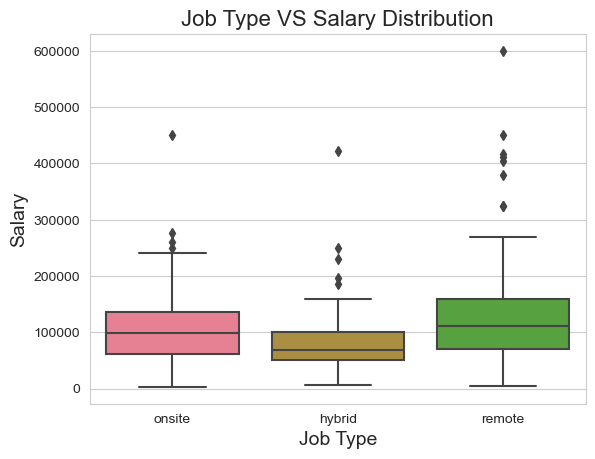

In [76]:
#Salary distribution by job type
sns.set_palette('husl')
ax = sns.boxplot(data=df, x='job_type', y='salary')
ax.set_title('Job Type VS Salary Distribution', fontdict={'fontsize': 16})
ax.set_xlabel('Job Type', fontdict={'fontsize': 14})
ax.set_ylabel('Salary', fontdict={'fontsize': 14})


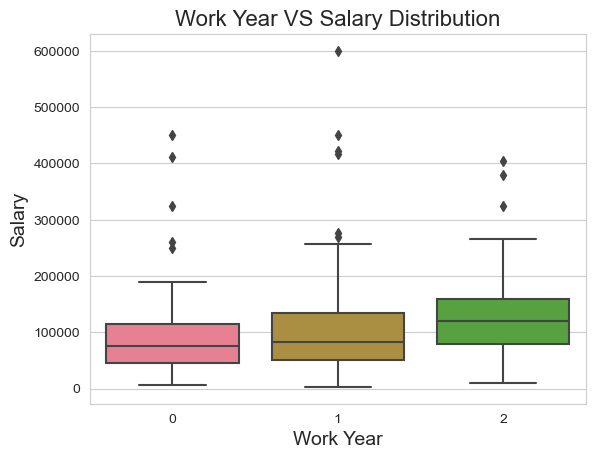

In [77]:
#Salary distribution by work year
sns.set_palette('husl')
ax = sns.boxplot(data=df, x='work_year', y='salary')
ax.set_title('Work Year VS Salary Distribution', fontdict={'fontsize': 16})
ax.set_xlabel('Work Year', fontdict={'fontsize': 14})
ax.set_ylabel('Salary', fontdict={'fontsize': 14})
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()


In [78]:
#Save the cleaned and analyzed data to a new CSV file
df.to_csv("Data Science Job Salaries/cleaned_ds_salaries.csv", index=False)